# Titanic Survival Prediction

This project analyzes passenger data from the Titanic to predict survival outcomes using machine learning. The goal is to build a classification model using various passenger features like age, sex, class, and more.

We use the Kaggle Titanic dataset, perform data cleaning, feature engineering, and evaluate a Random Forest model with appropriate metrics.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
train_data = pd.read_csv("C:/Users/PC/Downloads/titanic/train.csv")
test_data = pd.read_csv("C:/Users/PC/Downloads/titanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

We explore the structure of the data, check for missing values, and visualize relationships.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.duplicated().sum()

0

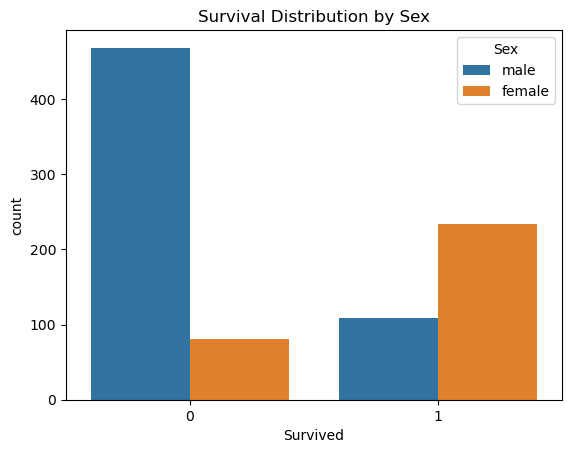

In [7]:
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title("Survival Distribution by Sex")
plt.show()

## Data Cleaning

We fill missing values in 'Age' with the median, 'Embarked' with the mode, and drop 'Cabin' due to too many missing entries.

In [8]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)
train_data.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)

## Feature Engineering

We convert categorical variables to numerical and create a new feature for family size.

In [9]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"]
train_data.drop(columns=["SibSp", "Parch"], inplace=True)

# Convert categorical variables to dummy variables
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked", "Pclass"], drop_first=True)


## Model Training

We use a Random Forest Classifier and also compare it with a Logistic Regression baseline.

In [10]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

## Model Evaluation

We compare both models using accuracy, confusion matrix, classification report, and ROC AUC.

In [14]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8212290502793296
Logistic Regression Accuracy: 0.8044692737430168

Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



I compared Logistic Regression and Random Forest on the Titanic dataset. The Random Forest classifier achieved an accuracy of 82%, outperforming Logistic Regression (80%). It also showed a good balance between precision and recall, especially for non-survivors (precision = 0.84, recall = 0.86). The F1-scores suggest that the model is fairly robust across both classes. This indicates that ensemble methods like Random Forest are more capable of capturing non-linear relationships in this data than linear models.

Confusion Matrix (Random Forest):


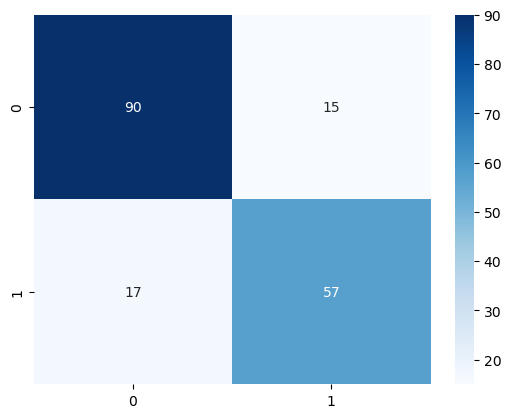

In [15]:
print("Confusion Matrix (Random Forest):")
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

### ROC AUC?
ROC Curve (Receiver Operating Characteristic): Plots the True Positive Rate (Recall) against the False Positive Rate at various thresholds.

AUC (Area Under the Curve): Measures the ability of the model to distinguish between the classes.

AUC ranges from 0.5 (no discrimination — random guessing) to 1.0 (perfect classification).

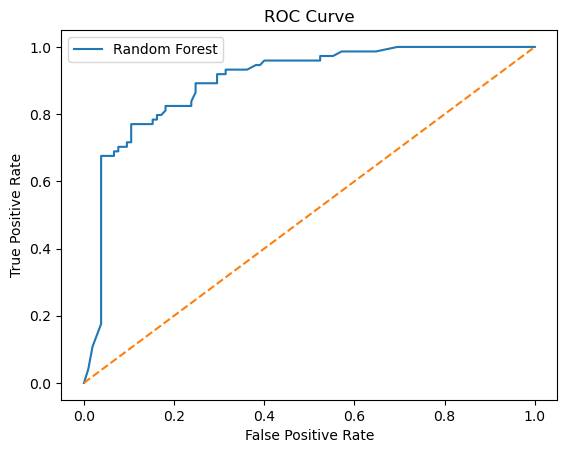

Random Forest ROC AUC: 0.8971042471042471


In [13]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("Random Forest ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

I evaluated model performance using the ROC AUC score, which reflects how well the model distinguishes between survivors and non-survivors. The Random Forest classifier achieved an AUC of 0.897, indicating strong discriminatory power. This supports its reliability beyond just raw accuracy.